In [24]:
import sys
import os
from collections import Counter

# import baseline
sys.path.append(os.path.abspath(os.path.join('..')))
from baseline import *

In [8]:
from sklearn.linear_model import LogisticRegressionCV

LG_clf = LogisticRegressionCV(cv=5, random_state=0)

In [9]:
LG_clf.fit(trainset.data.reshape(50000, 3072), trainset.targets)

LogisticRegressionCV(cv=5, random_state=0)

In [10]:
pred = LG_clf.predict(testset.data.reshape(10000, 3072))

Accuracy:  0.4019
F1 Score:  0.39820836065713755
Recall:  0.40190000000000003
Precision:  0.3975773317663348
----------------------------------------------------------------------


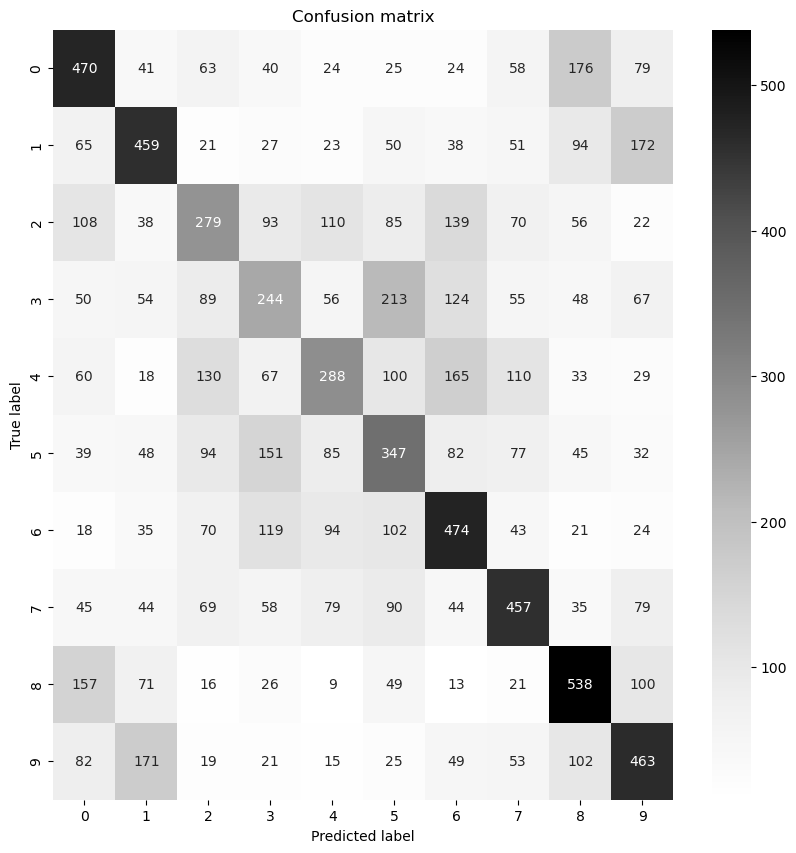

Classification Report:                precision    recall  f1-score   support

           0       0.43      0.47      0.45      1000
           1       0.47      0.46      0.46      1000
           2       0.33      0.28      0.30      1000
           3       0.29      0.24      0.26      1000
           4       0.37      0.29      0.32      1000
           5       0.32      0.35      0.33      1000
           6       0.41      0.47      0.44      1000
           7       0.46      0.46      0.46      1000
           8       0.47      0.54      0.50      1000
           9       0.43      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [11]:
# accuracy
print("Accuracy: ", accuracy_score(testset.targets, pred))
print("F1 Score: ", f1_score(testset.targets, pred, average='macro'))
print("Recall: ", recall_score(testset.targets, pred, average='macro'))
print("Precision: ", precision_score(testset.targets, pred, average='macro'))
print("-"*70)

# visualize confusion matrix
cm = confusion_matrix(testset.targets, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greys')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# classification report
print("Classification Report: ", classification_report(testset.targets, pred))

In [35]:
print('Top 5 missclassified labels: ')
most_common = Counter(pred[testset.targets != pred]).most_common(5)
for comm in most_common:
    print(f"{classes[comm[0]]}, {comm[1]}/{len(pred[testset.targets != pred])}")
print("-"*70)
print('Top 5 Combination of missclassified labels: ')
most_common = Counter([(testset.targets[i], pred[i]) for i in range(len(pred)) if testset.targets[i] != pred[i]]).most_common(5)
for comm in most_common:
    print(f"{classes[comm[0][0]]} -> {classes[comm[0][1]]}, {comm[1]}/{len(pred[testset.targets != pred])}")

Top 5 missclassified labels: 
dog, 739/5981
frog, 678/5981
plane, 624/5981
ship, 610/5981
truck, 604/5981
----------------------------------------------------------------------
Top 5 Combination of missclassified labels: 
cat -> dog, 213/5981
plane -> ship, 176/5981
car -> truck, 172/5981
truck -> car, 171/5981
deer -> frog, 165/5981


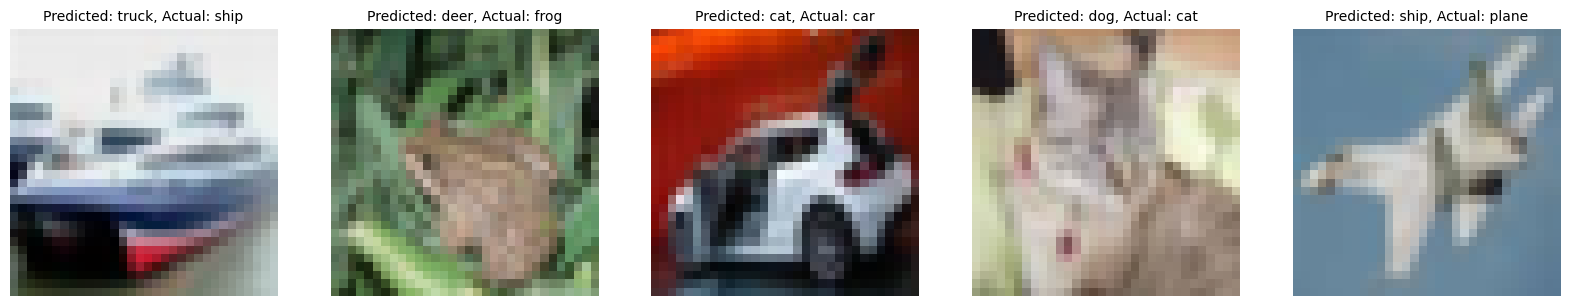

In [16]:
missclassified_idx = np.where(pred != testset.targets)[0]
missclassified_images = testset.data[missclassified_idx]
missclassified_labels = np.array(testset.targets)[missclassified_idx]
predicted_labels = pred[missclassified_idx]

plt.figure(figsize=(20, 4))
for index, (image, label, predicted_label) in enumerate(zip(missclassified_images[:5], missclassified_labels[:5], predicted_labels[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image)
    plt.title("Predicted: {}, Actual: {}".format(classes[predicted_label], classes[label]), fontsize = 10)
    plt.axis('off')
plt.show()

## Conclusion
* ### Logistic Regression Classifier

The Dataset's resolution is quite low, so it is not easy to distinguish the images.

Maybe should have some try with the image resolution by using the image augmentation on preprocessing step.

  * Lower than Support Vector Machine Classifier

<hr>

## Score
* ### test score
  * Accuracy:  0.4019
  * F1 Score:  0.39820836065713755
  * Recall:  0.40190000000000003
  * Precision:  0.3975773317663348

<hr>

This is just for academic purpose
So, I ain't gonna evolve this by hyperparameter-tunings as well

Using default parameters

<hr>

### But gotta check the sequence and flow is correct